# Clustering - Conjunto de Datos Iris

Aplicando técnicas de clustering se buscó segmentar las especies de la flor Iris utilizando el conjunto de datos clásico de Machine Learning. Se explorarán los datos visualmente y se implementará el algoritmo K-Means para agrupar las muestras según la forma del sépalo y el pétalo. Además, se empleará el método del "codo" y la librería kneed para determinar el número óptimo de clusters. Finalmente, se compararán los resultados obtenidos con los datos reales para evaluar la efectividad del modelo.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from kneed import KneeLocator
%matplotlib inline

In [114]:
def borrarNulosDuplicados(df, cant_object, cant_obs, flag_object):
    if cant_obs == 0:  
        print("No hay observaciones en el DataFrame.")
        return df
    
    prop = cant_object / cant_obs
    type_data = "nulos" if flag_object else "duplicados"

    if prop == 0:
        print(f"El porcentaje de datos {type_data} es del 0%. No es necesario eliminarlos.")
    elif prop > 0.05:  # Regla del 5%
        print(f"El porcentaje de datos {type_data} es del {prop*100:.2f}%. Se debe hacer otro método de eliminación.")
    else:
        print(f"El porcentaje de datos {type_data} es del {prop*100:.2f}%. Se pueden eliminar los datos.")

        if flag_object:
            df = df.dropna()
        else:
            df = df.drop_duplicates()

    return df

In [115]:
iris_df_s1 = pd.read_csv("iris.csv")

columns = iris_df_s1.columns
cant_obs = iris_df_s1.shape[0]
cant_var = iris_df_s1.shape[1]
cant_nulos = iris_df_s1.isnull().sum().sum()
cant_dupli = iris_df_s1.duplicated().sum()

print("- Vista Previa DF:\n",iris_df_s1.head(10))
print(f"- Tamaño de DF: \n\t• {cant_obs} filas \n\t• {cant_var} columnas")
print(f"- Existen: \n\t• {cant_nulos} valores nulos \n\t• {cant_dupli} valores duplicados")
print("- Columnas:")
for col in columns:
  print(f"\t• {col}")


iris_df_s1 = borrarNulosDuplicados(df=iris_df_s1, cant_object=cant_nulos, cant_obs=cant_obs, flag_object=True)
iris_df_s1 = borrarNulosDuplicados(df=iris_df_s1, cant_object=cant_dupli, cant_obs=cant_obs, flag_object=False)

iris_df_s2 = iris_df_s1.copy()
iris_df_s3 = iris_df_s1.copy()

- Vista Previa DF:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1
- Tamaño de DF: 
	• 150 filas 
	• 4 columnas
- Existen: 
	• 0 valores nulos 
	• 3 valores duplicados
- Columnas:
	• sepal_length
	• sepal_width
	• petal_length
	• petal_width
El porcentaje de datos nulos es del 0%. No es necesario eliminarlos.
El porcentaje de datos duplicados es del 2.00%. Se pueden eliminar los datos.


## Sección 1

1. **Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo:**

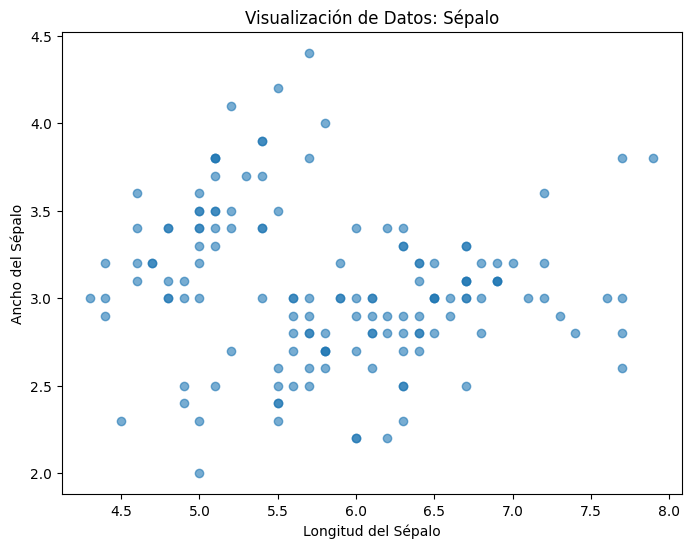

In [116]:
# Gráfico de dispersión de la forma del sépalo

plt.figure(figsize=(8,6))
plt.scatter(iris_df_s1["sepal_length"], iris_df_s1["sepal_width"], alpha=0.6)

# Etiquetas
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Visualización de Datos: Sépalo")

# Mostrar el gráfico
plt.show()

**Respuesta:**

A simple vista, podemos notar que hay ciertos grupos de puntos, lo que sugiere que los datos pueden agruparse en clusters. 

Sin embargo, los puntos aún no tienen etiquetas, por lo que necesitamos aplicar métodos de clustering para confirmar las agrupaciones. 

2. **Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.**

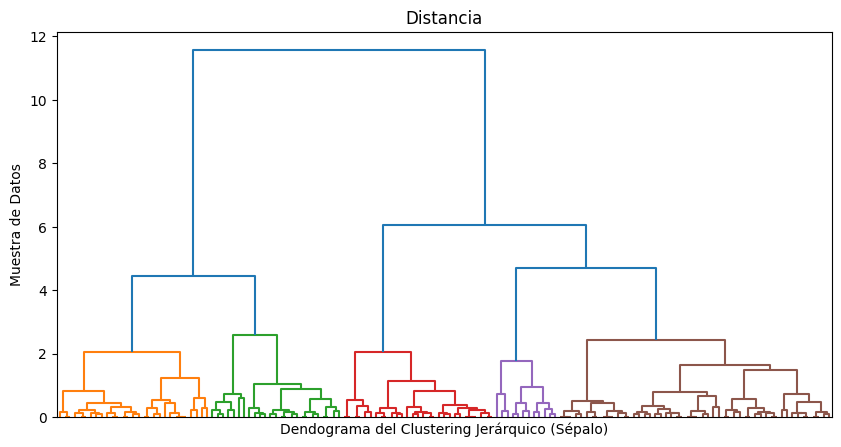

In [117]:
linked = sch.linkage(iris_df_s1[["sepal_length", "sepal_width"]], method = "ward")
plt.figure(figsize=(10,5))
sch.dendrogram(linked, no_labels = True, color_threshold = 4)

# Etiquetas
plt.xlabel("Dendograma del Clustering Jerárquico (Sépalo)")
plt.ylabel("Muestra de Datos")
plt.title("Distancia")

# Mostrar dendograma
plt.show()


**Respuesta:**

El dendrograma nos permite visualizar cómo se agrupan los datos jerárquicamente.

Cada bifurcación representa la unión de dos clusters.

El número de cortes óptimo en el dendrograma sugiere cuántos clusters podrían ser adecuados para los datos.

En este caso, parece haber al menos 3 o 4 posibles agrupaciones (separadas por diferentes colores).


3. **Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?**

4. **Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)**

5. **Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.**

6. **Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv**

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

**¿Funcionó el clustering con la forma del sépalo?****

## Sección 2

Repitan el proceso pero ahora utilizando la forma del pétalo. Respondan a las mismas preguntas.

In [118]:
petals = iris_df_s2.filter(items=["petal_length", "petal_width"])
print(petals.head(n=10))

   petal_length  petal_width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2
3           1.5          0.2
4           1.4          0.2
5           1.7          0.4
6           1.4          0.3
7           1.5          0.2
8           1.4          0.2
9           1.5          0.1


1. **Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del pétalo:**

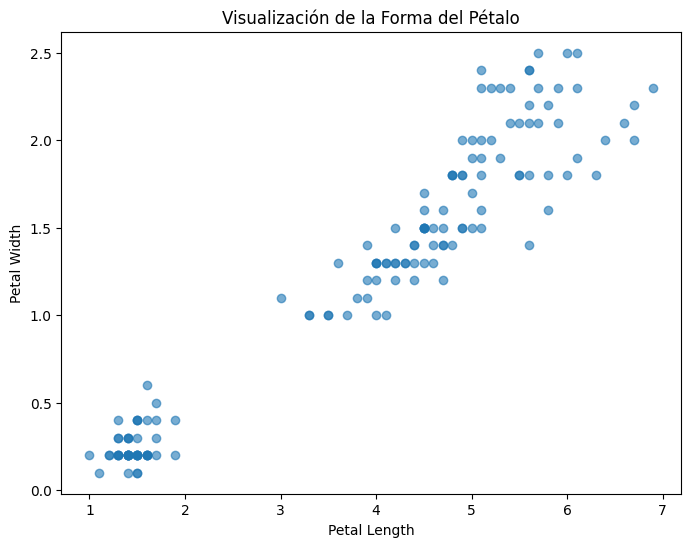

In [119]:
# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(petals["petal_length"], petals["petal_width"], alpha=0.6)

# Configurar etiquetas y título
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Visualización de la Forma del Pétalo")

# Mostrar gráfico
plt.show()

**Respuesta:** Se observa una clara separación de grupos que corresponde a la proporción entre el largo y el ancho de los pétalos. Los pétalos con menor longitud tienden a tener un ancho pequeño, mientras que los pétalos más largos presentan un ancho proporcionalmente mayor. Esto sugiere la existencia de una relación lineal positiva entre ambas variables. Además, la separación de grupos podría indicar la presencia de categorías o especies diferentes.

2. **Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.**

In [120]:
def kMeansIrisPetalo(df, n, flag = False, getDF = False):
  kmeans = KMeans(n_clusters = n)
  kmeans.fit(df)

  clusters_identificados = kmeans.fit_predict(df)
  
  if flag:
    print(clusters_identificados)

  # Crear una copia de los datos
  datos_con_clusters = df.copy()

  # Crear una nueva serie, que tenga el cluster identificado para cada observación
  datos_con_clusters['Cluster'] = clusters_identificados

  if flag:
    print(datos_con_clusters)

  # Contar la cantidad de datos en cada cluster
  cantidad_por_cluster = datos_con_clusters["Cluster"].value_counts()
  
  datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

  fig = px.scatter(datos_con_clusters, 
                  x = "petal_length", 
                  y = "petal_width", 
                  color = "Cluster",
                  title= f"Kmeans para {n} clústers"
                  )

  fig.show()
  
  return (datos_con_clusters, cantidad_por_cluster) if getDF else cantidad_por_cluster

In [121]:
clusters_normal = kMeansIrisPetalo(df=petals, n=2)

**Respuesta:** Se puede visualizar los clusters por colores:

- `Cluster 0 (rojo)` representa una agrupación de puntos que están distribuidos principalmente en la región con valores más altos de petal_length y petal_width.
- `Cluster 1 (azul)` representa puntos en la región con valores más bajos de petal_length y petal_width.

La separación de clusters también refuerza la relación lineal positiva entre *petal_length* y *petal_width*, ya que los puntos de cada cluster están alineados siguiendo esa tendencia como se mencionó en el inciso 1.

3. **Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?**

In [122]:
# Escalar los datos para conservar consistencia en los grupos
scaler = StandardScaler()
petals_standardized = scaler.fit_transform(petals)
petals_scaled_df = pd.DataFrame(petals_standardized, columns=petals.columns)
clusters_estandar = kMeansIrisPetalo(df=petals_scaled_df, n=2)

In [123]:
print(clusters_normal)
print(clusters_estandar)

Cluster
0    98
1    49
Name: count, dtype: int64
Cluster
0    99
1    48
Name: count, dtype: int64


**Respuesta:** Cuando estandarizamos los datos, le decimos al algoritmo de K-Means que no le dé más importancia a los números grandes que a los pequeños. Por ejemplo, en este caso, la longitud del pétalo (petal_length) y el ancho del pétalo (petal_width) están en centímetros:

- Los cambios en X (longitud del pétalo) afectaban mucho más la distancia entre los puntos y los centros de los clusters que los cambios en Y (ancho del pétalo).
- El punto que cambió de cluster probablemente estaba más cerca del centro del Cluster 0 en términos de petal_length, pero no tanto en petal_width.

4. **Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)**

In [124]:
def metodoCodo(df, i, f):
    # Parámetros de K-Means
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    # Lista para almacenar los valores de WCSS
    wcss = []

    # Iterar para diferentes valores de K (número de clusters)
    for k in range(i, f+1):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    # Crear un DataFrame para visualizar WCSS
    datos_WCSS = pd.DataFrame({"K": range(1, 11), "WCSS": wcss})

    # Graficar la relación entre K y WCSS
    fig = px.line(datos_WCSS, x="K", y="WCSS", title="Método del Codo: WCSS vs K")
    fig.update_xaxes(title_text="Número de Clusters (K)")
    fig.update_yaxes(title_text="WCSS")
    fig.show()
    
    return wcss

In [125]:
wcss_pet = metodoCodo(df= petals_scaled_df, i=1, f=10)

In [126]:
localizador_codo = KneeLocator(range(1, 11), 
                               wcss_pet, 
                               curve = "convex", 
                               direction = "decreasing"
                              )

print(f"El número recomendado de clústers es {localizador_codo.elbow}.")

El número recomendado de clústers es 3.


**Respuesta:** En la gráfica se observa que el descenso o cambio se reduce notablemente a partir de k = 3. Para confirmar este resultado, se utilizó la librería Kneed, la cual corrobora que el valor óptimo visual identificado (k = 3) coincide con el obtenido mediante este método.

5. **Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.**

In [127]:
cluster_n2 = kMeansIrisPetalo(df=petals_scaled_df, n=2)
iris_compare, cluster_n3 = kMeansIrisPetalo(df=petals_scaled_df, n=3, getDF=True)
cluster_n4 = kMeansIrisPetalo(df=petals_scaled_df, n=4)
cluster_n5 = kMeansIrisPetalo(df=petals_scaled_df, n=5)

6. **Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv**

In [128]:
iris_sol = pd.read_csv("iris-con-respuestas.csv")
iris_sol_species = iris_sol["species"]
iris_compare_cluster = iris_compare["Cluster"]

print("- Categorías de DF comparación:\n", iris_compare_cluster.unique(),"\n")
print("- Cantidad de cada categoría de DF comparación:\n", iris_compare_cluster.value_counts(),"\n")
print("- Categorías de DF solución:\n", iris_sol_species.unique(),"\n")
print("- Cantidad de cada categoría de DF solución:\n", iris_sol_species.value_counts(),"\n")

- Categorías de DF comparación:
 [1, 2, 0]
Categories (3, int32): [0, 1, 2] 

- Cantidad de cada categoría de DF comparación:
 Cluster
2    52
1    48
0    47
Name: count, dtype: int64 

- Categorías de DF solución:
 ['setosa' 'versicolor' 'virginica'] 

- Cantidad de cada categoría de DF solución:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64 



In [129]:
# Tabla para determinar la relacion cluster especie
table_compare = pd.crosstab(iris_compare_cluster, iris_sol_species)
print("- Tabla cruzada de clusters/species:\n")
print(table_compare)

print("\n- Porcentaje de precisión de K-means:\n")

for i in range(len(table_compare.columns)):  
    nCol = table_compare.columns[i]
    col = table_compare[nCol]
    cant_sol = col.sum()
    cant_compare = col.max()
    fila_max = col.idxmax()
    presicion = (cant_compare * 100)/cant_sol
    print(f"\tEl cluster {fila_max} tuvo una presición del {presicion:.1f}% correspondiente a la especie {nCol}.\n")

- Tabla cruzada de clusters/species:

species  setosa  versicolor  virginica
Cluster                               
0             0           4         43
1            48           0          0
2             2          46          4

- Porcentaje de precisión de K-means:

	El cluster 1 tuvo una presición del 96.0% correspondiente a la especie setosa.

	El cluster 2 tuvo una presición del 92.0% correspondiente a la especie versicolor.

	El cluster 0 tuvo una presición del 91.5% correspondiente a la especie virginica.



**Respuesta:** El archivo iris-con-respuestas.csv tiene las especies reales de las flores: setosa, versicolor y virginica. Cada especie tiene exactamente 50 observaciones, lo que da una distribución equilibrada: 50-50-50.

Por otro lado, los clusters generados por el modelo K-Means (usando el número recomendado de clusters k=3) no coinciden exactamente con esta distribución, pero sí con la cantidad de los clusters-especies.

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

**¿Funcionó el clustering con la forma del pétalo?**

**Respuesta:** Sí. ¿Por qué?:

- K-Means es un algoritmo **no supervisado**, lo que significa que **no tiene acceso a las etiquetas reales de las especies (`setosa`, `versicolor`, `virginica`)**.
- En lugar de agrupar según las especies, K-Means agrupa los datos en función de las distancias en el espacio de las características (`petal_length` y `petal_width` en este caso), dado esto se puede observar en el paso anterior que los clusters tuvieron una presición elevada para identificar especies con un máximo de error del 8.5% y un mínimo del 4% obtenido por la tabla cruzada:


  | Cluster  | setosa | versicolor | virginica |
  |----------|--------|------------|-----------|
  | 0        | 48     | 0          | 0         |
  | 1        | 0      | 4          | 43        |
  | 2        | 2      | 46         | 4         |

  - **Cluster 0**:
    - Tiene 48 observaciones de `setosa`.
    - Esto indica que el modelo K-Means identificó correctamente la mayoría de las flores de esta especie como pertenecientes a un único cluster.
    - Pero 2 observaciones de `setosa` fueron asignadas incorrectamente a otro cluster (Cluster 2).

  - **Cluster 1**:
    - Tiene 43 observaciones de `virginica` y 4 observaciones de `versicolor`.
    - Este cluster está mayormente compuesto por `virginica`, pero también incluye unas pocas observaciones de `versicolor`.

  - **Cluster 2**:
    - Tiene 46 observaciones de `versicolor`, 4 observaciones de `virginica`, y 2 observaciones de `setosa`.
    - Este cluster está mayormente compuesto por `versicolor`, pero incluye algunas observaciones incorrectas de otras especies.